In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.DataFrame({
    "name":["raghab","arc","rito","src","krasp","swor","ramos"],
    "age":[19,18,21,17,20,18,21],
    "salary":[7000,10000,15000,12000,20000,19000,25000]
})
df

,name,age,salary
0,raghab,19,7000
1,arc,18,10000
2,rito,21,15000
3,src,17,12000
4,krasp,20,20000
5,swor,18,19000
6,ramos,21,25000


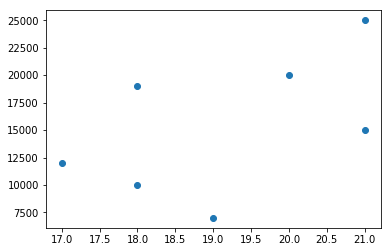

In [3]:
plt.scatter(df["age"],df["salary"])

In [4]:
kn=KMeans(n_clusters=3)
kn

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
y_predicted=kn.fit_predict(df[["age","salary"]])
y_predicted

array([1, 1, 0, 1, 0, 0, 2])

In [6]:
df["cluster"]=y_predicted
df

,name,age,salary,cluster
0,raghab,19,7000,1
1,arc,18,10000,1
2,rito,21,15000,0
3,src,17,12000,1
4,krasp,20,20000,0
5,swor,18,19000,0
6,ramos,21,25000,2


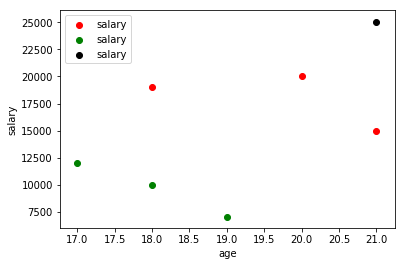

In [7]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.age,df1.salary,color="red")
plt.scatter(df2.age,df2.salary,color="green")
plt.scatter(df3.age,df3.salary,color="black")
plt.xlabel("age")
plt.ylabel("salary")
plt.legend()

In [8]:
scaler=MinMaxScaler()
scaler.fit(df[["salary"]])
df["salary"]=scaler.transform(df[["salary"]])
scaler.fit(df[["age"]])
df.age=scaler.transform(df[['age']])
df

C:\Users\ARIJIT ROYCHAUDHURY\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\ARIJIT ROYCHAUDHURY\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,name,age,salary,cluster
0,raghab,0.50,0.000000,1
1,arc,0.25,0.166667,1
2,rito,1.00,0.444444,0
3,src,0.00,0.277778,1
4,krasp,0.75,0.722222,0
5,swor,0.25,0.666667,0
6,ramos,1.00,1.000000,2


In [9]:
km=KMeans(n_clusters=3)
y_predicted=kn.fit_predict(df[["age","salary"]])
y_predicted

array([1, 1, 0, 1, 0, 2, 0])

In [10]:
df["cluster"]=y_predicted
df

,name,age,salary,cluster
0,raghab,0.50,0.000000,1
1,arc,0.25,0.166667,1
2,rito,1.00,0.444444,0
3,src,0.00,0.277778,1
4,krasp,0.75,0.722222,0
5,swor,0.25,0.666667,2
6,ramos,1.00,1.000000,0


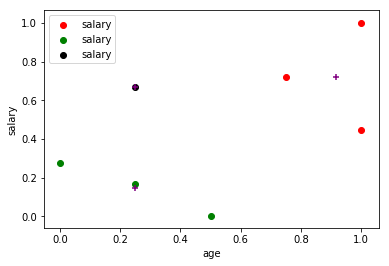

In [11]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.age,df1.salary,color="red")
plt.scatter(df2.age,df2.salary,color="green")
plt.scatter(df3.age,df3.salary,color="black")
plt.scatter(kn.cluster_centers_[:,0],kn.cluster_centers_[:,1],color="purple",marker="+")
plt.xlabel("age")
plt.ylabel("salary")
plt.legend()

In [12]:
kn.cluster_centers_

array([[0.91666667, 0.72222222],
       [0.25      , 0.14814815],
       [0.25      , 0.66666667]])

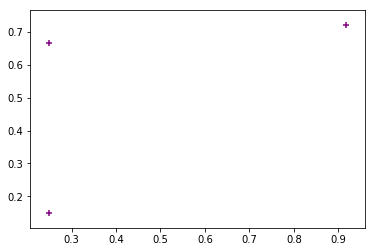

In [13]:
plt.scatter(kn.cluster_centers_[:,0],kn.cluster_centers_[:,1],color="purple",marker="+")

In [14]:
k_range=range(1,7)
sse=[]
for k in k_range:
    kn=KMeans(n_clusters=k)
    kn.fit(df[["age","salary"]])
    sse.append(kn.inertia_)

In [15]:
sse

[1.6622574955908291,
 0.5617283950617286,
 0.347993827160494,
 0.22183641975308643,
 0.10725308641975312,
 0.037422839506172846]

Text(0, 0.5, 'sum of square error')

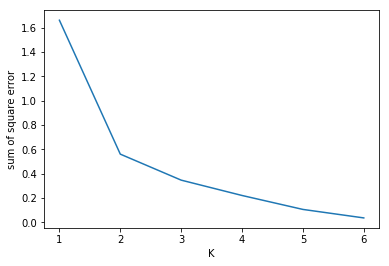

In [16]:
plt.plot(k_range,sse)
plt.xlabel("K")
plt.ylabel("sum of square error")